In [122]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from PIL import Image
from sklearn.linear_model import LogisticRegression
import time
%matplotlib inline

In [123]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()      # import dataset

('Training data shape: ', (60000, 28, 28))
('Training labels shape: ', (60000,))
('Test data shape: ', (10000, 28, 28))
('Test labels shape: ', (10000,))
('Image_label:', 7)


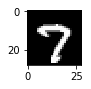

In [124]:
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Image_number = 52                            # pick a image number

plt.figure(figsize = (1,1))
plt.imshow(x_train[Image_number], cmap = 'gray')            # Show the grayscale image
print("Image_label:", y_train[Image_number])

In [125]:
x_train = x_train.reshape(60000,28*28)      # change the shape of Training images
x_test = x_test.reshape(10000,28*28)        # Change the shape of Testing images

print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

('Training data shape: ', (60000, 784))
('Training labels shape: ', (60000,))
('Test data shape: ', (10000, 784))
('Test labels shape: ', (10000,))


In [131]:
train_samples = 5000
model = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)

In [132]:
start = time.time()  # To calculate training time, Start

model.fit(x_train[:20000],y_train[:20000])           # Training function

end = time.time()   # To calculate training time, Stop
print ('Training time', end - start)

('Training time', 40.37853693962097)


In [133]:
score = model.score(x_test,y_test)                # Check accuracy on test set
print(score)

0.9146


('Correct Image_label:', 5)
('Predicted Label: ', array([5], dtype=uint8))


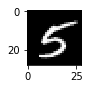

In [134]:
Test_image_number = 52             # Test image number
print("Correct Image_label:", y_test[Test_image_number])             # Correct Image label

Predicted_label = model.predict(x_test[Test_image_number].reshape(1,28*28))
print("Predicted Label: ", Predicted_label)

plt.figure(figsize = (1,1))
plt.imshow(x_test[Test_image_number].reshape(28,28), cmap = 'gray') # reshape image and show

('Predicted Label: ', array([3], dtype=uint8))


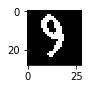

In [135]:
gimp_image = np.array(Image.open('gimp_image.png'))

plt.figure( figsize = (1,1))
plt.imshow(gimp_image, cmap = 'gray')
print("Predicted Label: ", model.predict(gimp_image.reshape(1,28*28)))